We organized the ISLES Challenge in the blue_isc5935/share/team02/data directory (in the HiPerGator environment) into masks, NIFTIs, and processedNIFTIs directories. The NIFTIs directory has 3 NIFTI files for each subject, one NIFTI for each MRI modality. Originally, these files were in folders for each subject, along with some .json files. I moved the .nii files so that they were all in the same directory, making it easy to load those files in all at once. There may be a need to differentiate these files based on modality, in which case the file names can be checked. Similarly, the masks were placed in individual directories for each subject along with some other derivative information, so I isolated all those masks files into one directory, thus making it easy to load in that data if necessary. In anticpation of needing to remain organized after any preprocessing, I made an empty processedNIFTIs directory to store any future preprocessed files. ISLES only provides a training dataset, but we will likely split the existing training dataset into training, validation, and test sets, in which case we will use a split data function to do so. It seems that this can be done when loading in the data with relatively little complexity. Splitting up the data while loading can also allow us to change the training, validation, and test set proportions by using a function.

In [1]:
%load_ext autoreload
%autoreload 2

import torch
import torchvision
import matplotlib.pyplot as plt
import os
from os.path import join
from torch.utils.data import Dataset, DataLoader
from torchvision.io import read_image
import torchvision.transforms as transforms

import numpy as np

import itk

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Running on {device}")

import MyGenerator
      

Running on cpu
Running on cpu


In [48]:
root_path = "data/"
dataset = MyGenerator.MyDataset(join(join(root_path,'NIFTIs'),'NIFTIs').replace("\\","/"), join(root_path,'masks').replace("\\","/"),transform=transforms.Normalize([0],[1]))

Running on cpu


In [36]:
def plot_batch(batch_imgs, batch_seg):
    batch_size = len(batch_imgs)
    fig, axs = plt.subplots(batch_size, 2, figsize=(10,5))
    print(batch_seg.shape)
    for i in range(batch_size):
        axs[i,0].imshow(batch_imgs[i,2,20,:,:], origin='lower')
        axs[i,0].set_title(f"Image {i} from batch")
        axs[i,1].imshow(batch_seg[i,20,:,:], origin='lower')
        axs[i,1].set_title(f"Seg {i} from batch")
        #axs[i].imshow(batch_imgs[i,10,:,:])
        #axs[i].set_title(f"Image {i} from batch")
    plt.show()

In [29]:
def Question3(batchSize):
    myloader = DataLoader(dataset, batch_size=batchSize, shuffle=True)    

    ##
    # myiter = iter(myloader)
    # val  = next(myiter)
    for batch in myloader:
        x, y = batch
        #print("x: ", x.shape)
        #print("y: ", y.shape)
        plot_batch(x, y)
        print(type(x))
        print('Batch size:', x.size())
        break

In [37]:
import ipywidgets as widgets
from ipywidgets import interact, Layout

BatchSizeSlider = widgets.IntSlider(value=2,min=1,max=7,step=1,description="Batch Size")



#widgets.interact(FuncForWidget,HiddenLayers=HiddenLayerSlider,Neurons=NeuronsSlider,Epochs=EpochsSlider,ActHidden=ActHiddenDropDown,ActOutput=ActOutputDropDown)

button = widgets.Button(description='Start')

def on_button_click(button):
    output.clear_output()
    with output:
        Question3(BatchSizeSlider.value)

button.on_click(on_button_click)

output = widgets.Output()

display(BatchSizeSlider, button, output)

IntSlider(value=2, description='Batch Size', max=7, min=1)

Button(description='Start', style=ButtonStyle())

Output()

In [36]:
#All cells below here were for testing and troubleshooting purposes

dataset.__getitem__(221)
JustANameImgItk, JustANameSegItk = dataset.__getitem__(3)
JustANameImgNP = np.asarray(JustANameImgItk)
JustANameSegNP = np.asarray(JustANameSegItk)
JustANameImgNP.shape

metadataIMG=itk.dict_from_image(JustANameImgItk)
metadataSEG=itk.dict_from_image(JustANameSegItk)



#metadataIMG
SEGpixdims = metadataSEG['spacing']
SEGdims = metadataIMG['size']

metadataIMG



batch_size = len(batch_imgs)
fig, axs = plt.subplots(batch_size, 2, figsize=(10,5))
print(batch_seg.shape)
for i in range(batch_size):
    axs[i,0].imshow(batch_imgs[i,31,:,:])
    axs[i,0].set_title(f"Image {i} from batch")
    axs[i,1].imshow(batch_seg[i,31,:,:])
    axs[i,1].set_title(f"Seg {i} from batch")
        #axs[i].imshow(batch_imgs[i,10,:,:])
        #axs[i].set_title(f"Image {i} from batch")
plt.show()

Running on cpu
(30, 192, 192)
(30, 192, 192)
sub-strokecase0222_ses-0001_adc.nii.gz
sub-strokecase0222_ses-0001_msk.nii.gz
NEW version
(72, 112, 112)
(72, 112, 112)
sub-strokecase0004_ses-0001_adc.nii.gz
sub-strokecase0004_ses-0001_msk.nii.gz
NEW version


RuntimeError: No suitable template parameter can be found.

In [44]:
case =47
#sub-strokecase0202_ses-0001_adc.nii.gz
file_name_msk = f"data/masks/sub-strokecase0{case:03d}_ses-0001_msk.nii.gz"
file_name_img = f"data/NIFTIs/NIFTIs/sub-strokecase0{case:03d}_ses-0001_adc.nii.gz"
mask = itk.imread(file_name_msk)
img = itk.imread(file_name_img)

print("Spacing:", itk.dict_from_image(img)['spacing'])

print(img.shape)
print(mask.shape)
itk.array_from_image(img)
itk.array_from_image(mask)

Spacing: (2.0, 2.0, 2.0)
(72, 112, 112)
(72, 112, 112)


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [11]:
myloader

In [10]:
dataset.masks_names

['sub-strokecase0001_ses-0001_msk.nii.gz',
 'sub-strokecase0002_ses-0001_msk.nii.gz',
 'sub-strokecase0003_ses-0001_msk.nii.gz',
 'sub-strokecase0004_ses-0001_msk.nii.gz',
 'sub-strokecase0005_ses-0001_msk.nii.gz',
 'sub-strokecase0006_ses-0001_msk.nii.gz',
 'sub-strokecase0007_ses-0001_msk.nii.gz',
 'sub-strokecase0008_ses-0001_msk.nii.gz',
 'sub-strokecase0009_ses-0001_msk.nii.gz',
 'sub-strokecase0010_ses-0001_msk.nii.gz',
 'sub-strokecase0011_ses-0001_msk.nii.gz',
 'sub-strokecase0012_ses-0001_msk.nii.gz',
 'sub-strokecase0013_ses-0001_msk.nii.gz',
 'sub-strokecase0014_ses-0001_msk.nii.gz',
 'sub-strokecase0015_ses-0001_msk.nii.gz',
 'sub-strokecase0016_ses-0001_msk.nii.gz',
 'sub-strokecase0017_ses-0001_msk.nii.gz',
 'sub-strokecase0018_ses-0001_msk.nii.gz',
 'sub-strokecase0019_ses-0001_msk.nii.gz',
 'sub-strokecase0020_ses-0001_msk.nii.gz',
 'sub-strokecase0021_ses-0001_msk.nii.gz',
 'sub-strokecase0022_ses-0001_msk.nii.gz',
 'sub-strokecase0023_ses-0001_msk.nii.gz',
 'sub-strok

In [13]:
thisImage, thisSegment = dataset.__getITKObjects__(221)

Running on cpu


In [14]:
metadataIMG=itk.dict_from_image(thisImage)
metadataSEG=itk.dict_from_image(thisSegment)

In [15]:
metadataIMG

{'imageType': {'dimension': 3,
  'componentType': 'float32',
  'pixelType': 'Scalar',
  'components': 1},
 'name': '',
 'origin': (-101.00531005859375, 120.92924499511719, -57.996376037597656),
 'spacing': (2.5, 2.5, 2.5),
 'size': (110, 110, 72),
 'direction': array([[ 0.99279039, -0.09559484,  0.07231088],
        [-0.10072313, -0.99238151,  0.07094924],
        [-0.0649776 ,  0.0777211 ,  0.99485544]]),
 'data': array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0

In [16]:
dataset.__getitem__(39)

Running on cpu
Multimodal size: (3, 50, 100, 99)


(array([[[[-0.15900762, -0.15900762, -0.15900762, ..., -0.15900762,
           -0.15900762, -0.15900762],
          [-0.15900762, -0.15900762, -0.15900762, ..., -0.15900762,
           -0.15900762, -0.15900762],
          [-0.15900762, -0.15900762, -0.15900762, ..., -0.15900762,
           -0.15900762, -0.15900762],
          ...,
          [-0.15900762, -0.15900762, -0.15900762, ..., -0.15900762,
           -0.15900762, -0.15900762],
          [-0.15900762, -0.15900762, -0.15900762, ..., -0.15900762,
           -0.15900762, -0.15900762],
          [-0.15900762, -0.15900762, -0.15900762, ..., -0.15900762,
           -0.15900762, -0.15900762]],
 
         [[-0.15900762, -0.15900762, -0.15900762, ..., -0.15900762,
           -0.15900762, -0.15900762],
          [-0.15900762, -0.15900762, -0.15900762, ..., -0.15900762,
           -0.15900762, -0.15900762],
          [-0.15900762, -0.15900762, -0.15900762, ..., -0.15900762,
           -0.15900762, -0.15900762],
          ...,
          [-0

In [22]:
torch.tensor(thisImageItem)

tensor([[[-0.4210, -0.4210, -0.4210,  ..., -0.4210, -0.4210, -0.4210],
         [-0.4210, -0.4210, -0.4210,  ..., -0.4210, -0.4210, -0.4210],
         [-0.4210, -0.4210, -0.4210,  ..., -0.4210, -0.4210, -0.4210],
         ...,
         [-0.4210, -0.4210, -0.4210,  ..., -0.4210, -0.4210, -0.4210],
         [-0.4210, -0.4210, -0.4210,  ..., -0.4210, -0.4210, -0.4210],
         [-0.4210, -0.4210, -0.4210,  ..., -0.4210, -0.4210, -0.4210]],

        [[-0.4210, -0.4210, -0.4210,  ..., -0.4210, -0.4210, -0.4210],
         [-0.4210, -0.4210, -0.4210,  ..., -0.4210, -0.4210, -0.4210],
         [-0.4210, -0.4210, -0.4210,  ..., -0.4210, -0.4210, -0.4210],
         ...,
         [-0.4210, -0.4210, -0.4210,  ..., -0.4210, -0.4210, -0.4210],
         [-0.4210, -0.4210, -0.4210,  ..., -0.4210, -0.4210, -0.4210],
         [-0.4210, -0.4210, -0.4210,  ..., -0.4210, -0.4210, -0.4210]],

        [[-0.4210, -0.4210, -0.4210,  ..., -0.4210, -0.4210, -0.4210],
         [-0.4210, -0.4210, -0.4210,  ..., -0

In [8]:
dataset.__len__()

250

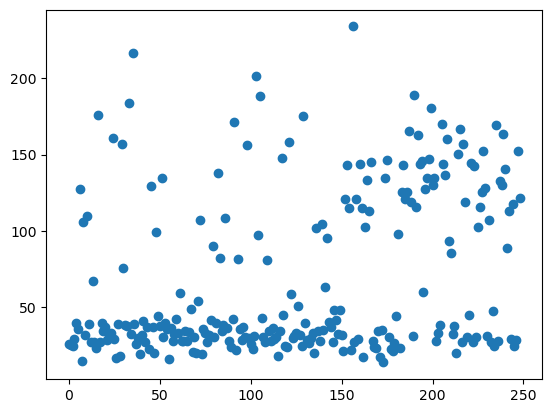

In [47]:
ImageMeansUNNORM = np.empty((0,2), float)
for i in range (0,249):
    image, mask = dataset.__getitem__(i, normalize=False)
    new_row = np.array([i, np.mean(image)])
    ImageMeansUNNORM = np.append(ImageMeansUNNORM,[new_row], axis=0)
    

plt.scatter(ImageMeansUNNORM[:,0], ImageMeansUNNORM[:,1])
plt.show()   
    
    

Running on cpu


invalid value encountered in divide


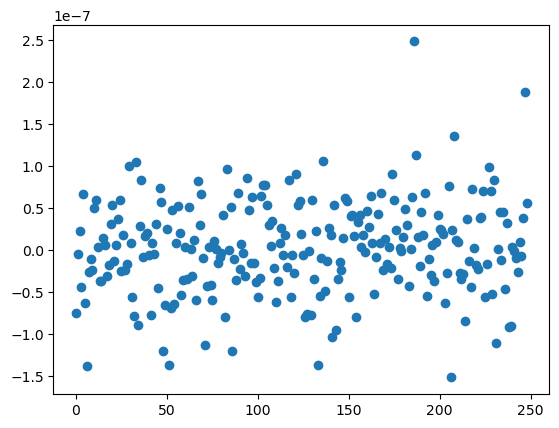

In [53]:
ImageMeansNORM = np.empty((0,2), float)
for i in range (0,249):
    image, mask = dataset.__getitem__(i, normalize=True)
    new_row = np.array([i, np.mean(image)])
    ImageMeansNORM = np.append(ImageMeansNORM,[new_row], axis=0)
    

plt.scatter(ImageMeansNORM[:,0], ImageMeansNORM[:,1])
plt.show()

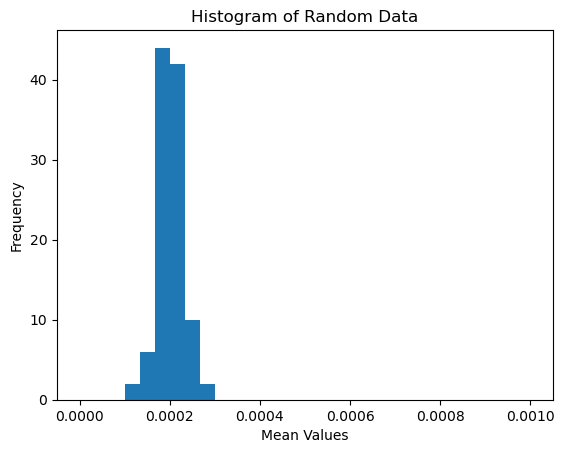

In [34]:
# plot a histogram of the data
plt.hist(ImageMeansUNNORM[:,1], bins=30, range=(0,0.001))

# add labels and title
plt.xlabel('Mean Values')
plt.ylabel('Frequency')
plt.title('Histogram of Random Data')

# display the plot
plt.show()

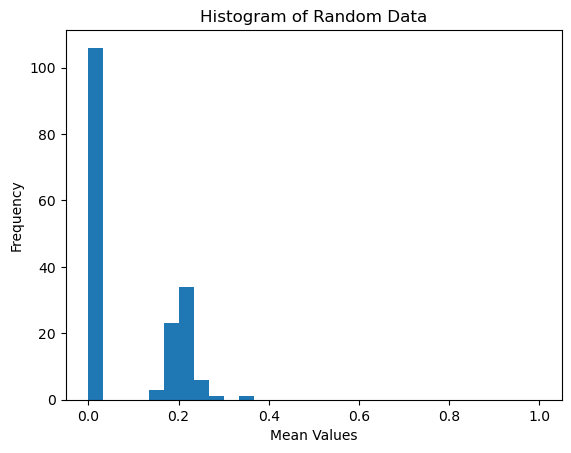

In [37]:
# plot a histogram of the data
plt.hist(ImageMeansUNNORM[:,1], bins=30, range=(0,1))

# add labels and title
plt.xlabel('Mean Values')
plt.ylabel('Frequency')
plt.title('Histogram of Random Data')

# display the plot
plt.show()

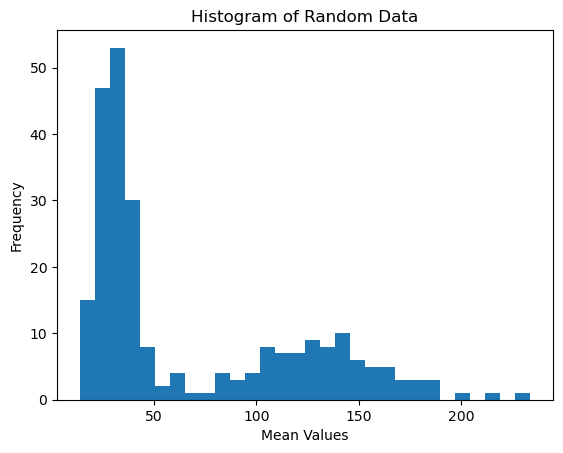

In [54]:
# plot a histogram of the data
plt.hist(ImageMeansUNNORM[:,1], bins=30)

# add labels and title
plt.xlabel('Mean Values')
plt.ylabel('Frequency')
plt.title('Histogram of Random Data')

# display the plot
plt.show()

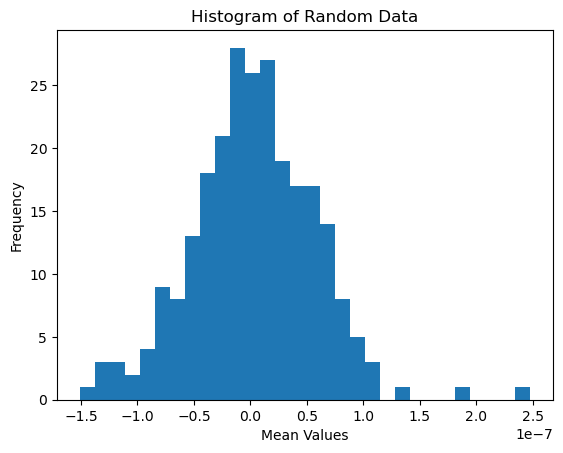

In [55]:
# plot a histogram of the data
plt.hist(ImageMeansNORM[:,1], bins=30)

# add labels and title
plt.xlabel('Mean Values')
plt.ylabel('Frequency')
plt.title('Histogram of Random Data')

# display the plot
plt.show()

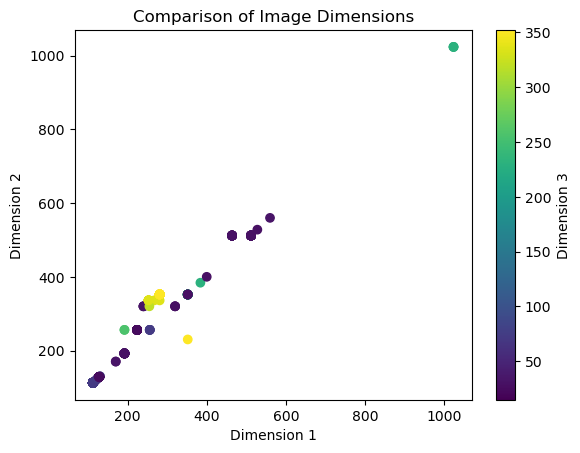

In [59]:
ImageMeansUNRES = np.empty((0,7), float)
for i in range (0,749):
    #note that I commented out mask for __getITKObjects__
    imageITK = dataset.__getITKObjects__(i, resampling=False)
    new_row = np.array([i, itk.dict_from_image(imageITK)['spacing'][0],
                        itk.dict_from_image(imageITK)['spacing'][1],
                        itk.dict_from_image(imageITK)['spacing'][2],
                        itk.dict_from_image(imageITK)['size'][0],
                       itk.dict_from_image(imageITK)['size'][1],
                       itk.dict_from_image(imageITK)['size'][2]])
    ImageMeansUNRES = np.append(ImageMeansUNRES,[new_row], axis=0)
    

plt.scatter(ImageMeansUNRES[:,4], ImageMeansUNRES[:,5], c=ImageMeansUNRES[:,6], cmap='viridis')

# set x-axis and y-axis labels, and add a colorbar
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar(label='Dimension 3')

# add a title
plt.title('Comparison of Image Dimensions')

# display the plot
plt.show()


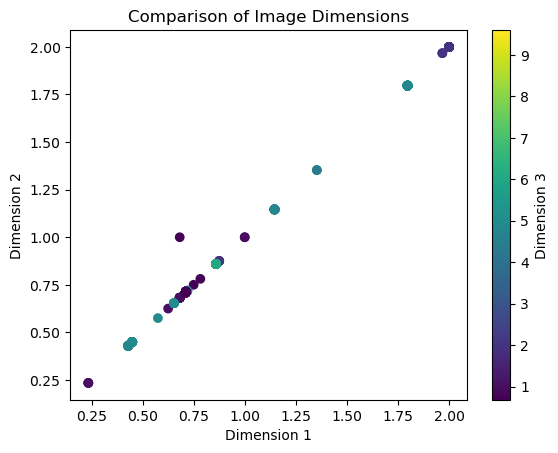

In [60]:
plt.scatter(ImageMeansUNRES[:,1], ImageMeansUNRES[:,2], c=ImageMeansUNRES[:,3], cmap='viridis')

# set x-axis and y-axis labels, and add a colorbar
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar(label='Dimension 3')

# add a title
plt.title('Comparison of Image Dimensions')

# display the plot
plt.show()


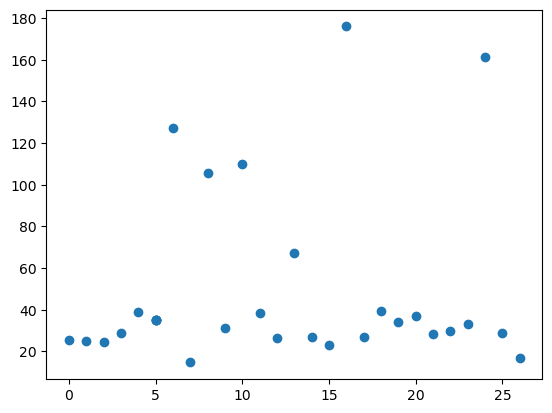

In [46]:
image, mask = dataset.__getitem__(5, normalize=False)
new_row = np.array([5, np.mean(image)])
ImageMeansUNNORM = np.append(ImageMeansUNNORM,[new_row], axis=0)
#ImageMeansUNNORM

plt.scatter(ImageMeansUNNORM[:,0], ImageMeansUNNORM[:,1])
plt.show()

In [ ]:
myTransform = transforms.Compose([
                transforms.Resize(size = (256,256)),
                #transforms.RandomRotation(degrees = (-20,+20)),
                transforms.CenterCrop(size=224),
                #transforms.RandomAutocontrast(p=0.5),
                #transforms.RandomEqualize(p=0.5),
                transforms.ToTensor(),
                #transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
                transforms.Normalize([0.485],[0.229])
        ])
#transforms.Normalize([0],[1])

In [57]:
dataset.__len__()

Running on cpu
Total images length:  750


250